# VAD Evaluations

This notebook evaulates three different Voice Activity Detectors on SuperVAD#1 dataset

In [1]:
import os
import torch
import webrtcvad
from evaluation import silero_vad
from utils import plot_waveform, plot_specgram, plot_labels, play_audio, 
from datasets import SAMPLE_RATE, DATASET_SAMPLE_LENGTH, TOKENS_PER_SECOND, preprocessed_audio_dataset, sample_dataset

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/steve/.cache/torch/hub/master.zip


## Dataset
Loading dataset and visualizing random sample from it.

Do not forget to execute `./download.sh` before launching this notebook

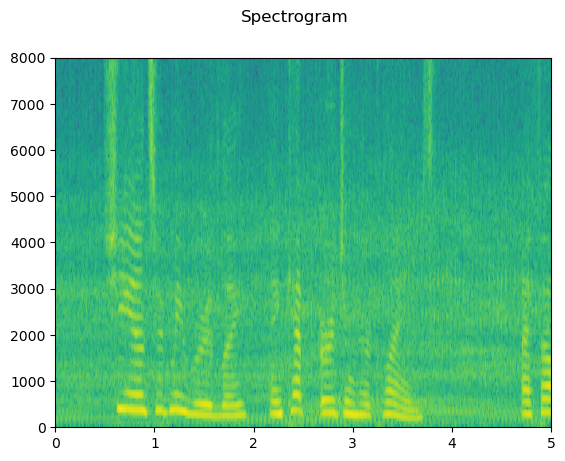

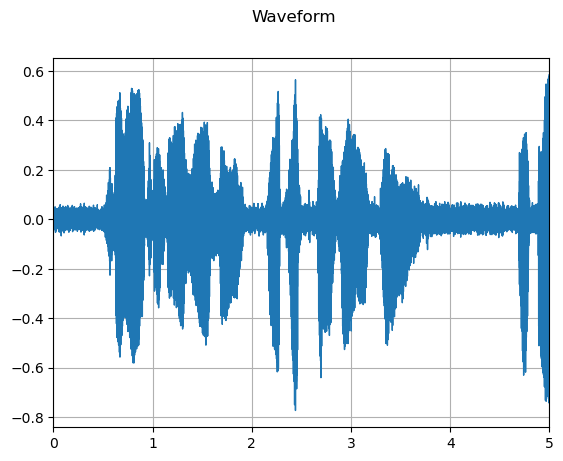

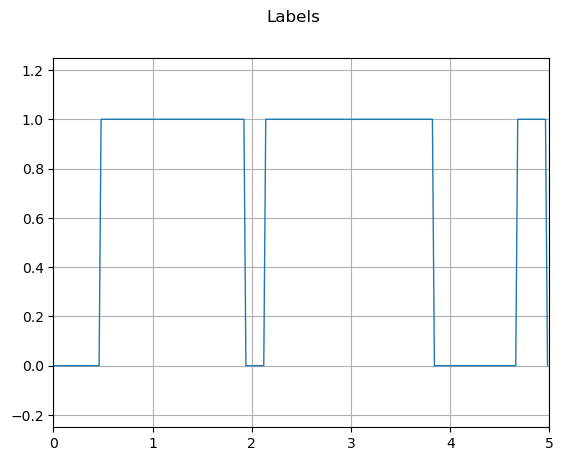

In [2]:
dataset = preprocessed_audio_dataset("./datasets/supervad-1/vad_test/")
sample, labels = dataset[22]

plot_specgram(sample)
plot_waveform(sample)
plot_labels(labels)
play_audio(sample)

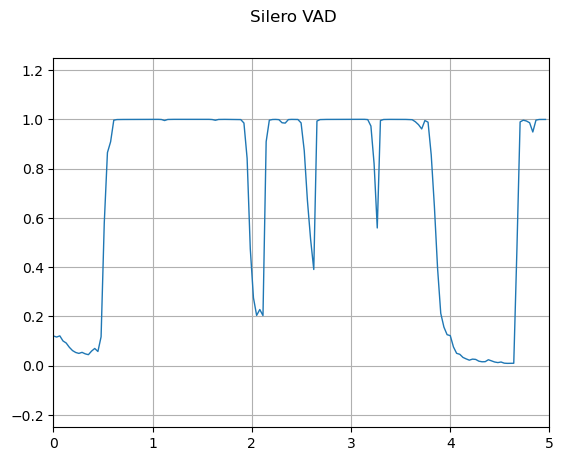

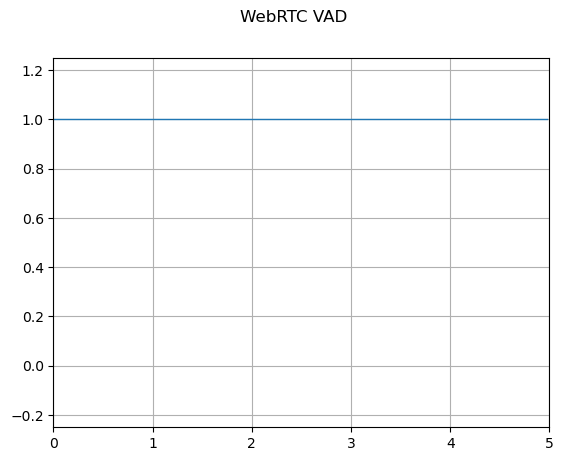

In [3]:
# Evaluations
plot_labels(silero_vad(sample[0]), sample_rate=31.25, title="Silero VAD")

def webrtc_vad(wav):
    vad = webrtcvad.Vad()
    vad.set_mode(3)
    speech_probs = []
    window_size_samples = 320
    for i in range(0, len(wav), window_size_samples):
        chunk = wav[i: i+window_size_samples]
        if len(chunk) < window_size_samples:
            break
        is_speech = vad.is_speech(chunk.numpy(), 16000)
        speech_probs.append(is_speech)
    return torch.tensor(speech_probs)

plot_labels(webrtc_vad(sample[0]), title="WebRTC VAD")